In [1]:
import numpy as np
import qutip as qt
from libraries import lib
from libraries.NeuralStates import *
import matplotlib.pyplot as plt

In [2]:
def ground_state_energy_per_site(h_t, N):
    Ps = 0.5 * np.arange(- (N - 1), N - 1 + 2, 2)
    Ps = Ps * 2 * np.pi / N
    energies_p_modes = np.array([energy_single_p_mode(h_t, P) for P in Ps])
    return - 1 / N * np.sum(energies_p_modes)
def energy_single_p_mode(h_t, P):
    return np.sqrt(1 + h_t**2 - 2 * h_t * np.cos(P))

In [3]:
N = 2; h = 10
print(ground_state_energy_per_site(h, N) * N)
print(lib.TFIM_hamiltonian(N, 1, h).eigenstates()[0][0])

-20.09975124224178
-20.09975124224176


In [4]:
N = 10; h = 1
ground_state_energy_per_site(h, N) * N

np.float64(-12.784906442999326)

In [5]:
lib.TFIM_hamiltonian(N, 1, h).eigenstates()[0][0]

np.float64(-12.784906442999324)

In [6]:
h = 0.1
print(ground_state_energy_per_site(h, N) * N)
print(lib.TFIM_hamiltonian(N, 1, h).eigenstates()[0][0])

-10.025015664234306
-10.025015664234315


In [7]:
h = 10
print(ground_state_energy_per_site(h, N) * N)
print(lib.TFIM_hamiltonian(N, 1, h).eigenstates()[0][0])

-100.25015664234306
-100.25015664234304


In [8]:
ground_state_energy_per_site(1, 20) * 20

np.float64(-25.49098968636475)

In [9]:
ground_state_energy_per_site(0.1, 20) * 20

np.float64(-20.05003132843168)

In [10]:
ground_state_energy_per_site(10, 20) * 20

np.float64(-200.50031328431683)

actual [ -2.82842712  -4.          -5.22625186  -6.47213595  -7.72740661
  -8.98791841 -10.25166179 -11.51754097 -12.78490644]
calcs [ -2.82842712  -3.46410162  -5.22625186  -6.15536707  -7.72740661
  -8.76257254 -10.25166179 -11.34256364 -12.78490644]


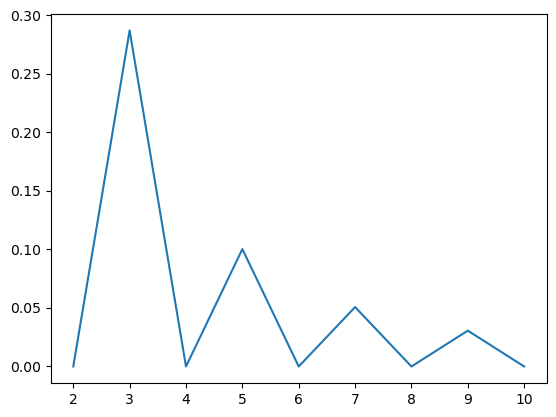

In [13]:
J = 1; Gamma = 1
ns = [n for n in range(2, 11)]
actuals = []
calcs = []
for n in ns:
    actuals.append(lib.TFIM_hamiltonian(n, J, Gamma).eigenstates()[0][0])
    calcs.append(n * ground_state_energy_per_site(Gamma, n))
actuals = np.array(actuals)
calcs = np.array(calcs)
print('actual', actuals)
print('calcs', calcs)
plt.plot(ns, (actuals - calcs) ** 2)

In [ ]:
for N in [6, 10, 20]:
    for h in [0.1, 1, 10]:
        print(f"N={N}, h={h} has GSE={lib.ground_state_energy(h, N)}")

N=6, h=0.1 has GSE=-10.025015664234306
N=6, h=1 has GSE=-12.784906442999326
N=6, h=10 has GSE=-100.25015664234306
N=10, h=0.1 has GSE=-10.025015664234306
N=10, h=1 has GSE=-12.784906442999326
N=10, h=10 has GSE=-100.25015664234306
N=20, h=0.1 has GSE=-10.025015664234306
N=20, h=1 has GSE=-12.784906442999326
N=20, h=10 has GSE=-100.25015664234306
